# Linear Regression

In [220]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
import datetime as dt
#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [221]:
tesla = pd.read_csv("C:/Users/Josica/Documents/ML/Project/TSLA.csv",header=0)

In [222]:
tesla

,Date,Open,High,Low,Close,Volume
0,29-01-2013,2.540000,2.562667,2.475333,2.530000,21399000
1,30-01-2013,2.523333,2.533333,2.495333,2.501333,14521500
2,31-01-2013,2.524667,2.524667,2.462000,2.500667,13521000
3,01-02-2013,2.544667,2.566667,2.508000,2.553333,16509000
4,04-02-2013,2.560000,2.561333,2.506000,2.516000,16920000
...,...,...,...,...,...,...
2561,31-03-2023,197.529999,207.789993,197.199997,207.460007,169638500
2562,03-04-2023,199.910004,202.690002,192.199997,194.770004,169545900
2563,04-04-2023,197.320007,198.740005,190.320007,192.580002,126463800
2564,05-04-2023,190.520004,190.679993,183.759995,185.520004,133882500


In [223]:
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla['Date'] = tesla['Date'].map(dt.datetime.toordinal)

C:\Users\Josica\AppData\Local\Temp\ipykernel_13068\2696810286.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [224]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2566 non-null   int64  
 1   Open    2566 non-null   float64
 2   High    2566 non-null   float64
 3   Low     2566 non-null   float64
 4   Close   2566 non-null   float64
 5   Volume  2566 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 120.4 KB


<Axes: >

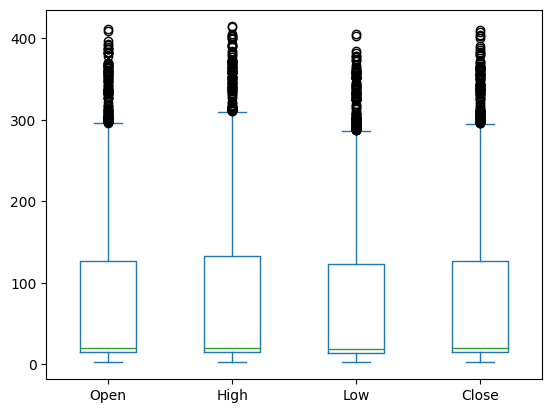

In [165]:
tesla[['Open','High','Low','Close']].plot(kind='box')

In [166]:
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [167]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']

In [168]:
lm = sm.OLS(Y,X).fit()

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [170]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.679
Method:                 Least Squares   F-statistic:                              5423.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):                        0.00
Time:                        18:01:30   Log-Likelihood:                         -14624.
No. Observations:                2566   AIC:                                  2.925e+04
Df Residuals:                    2565   BIC:                                  2.926e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0709      0.001     73.644      0.000       0.069       0.073
==============================================================================
Omnibus:                      485.960   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              816.823
Skew:                           1.248   Prob(JB):                    4.26e-178
Kurtosis:                       4.187   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [172]:
#plot(plot) #plotting offline
iplot(plot)

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
# Feature scaling
scaler = StandardScaler().fit(X_train)
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [175]:
print(lm.intercept_,lm.coef_)

-60.10665182718387 [0.10607512]


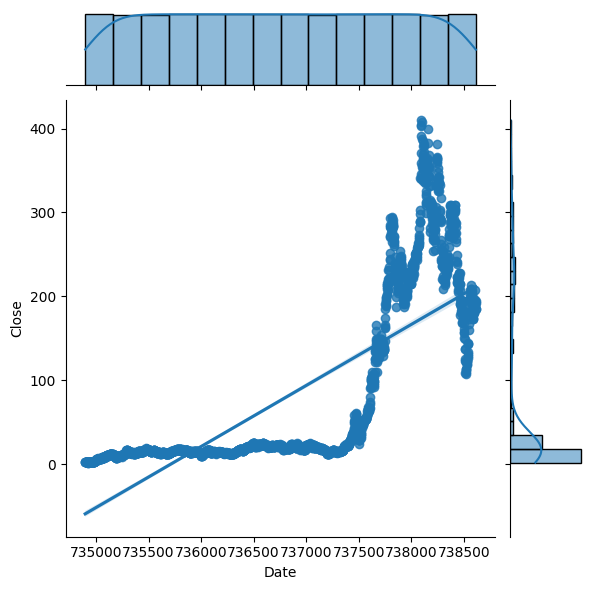

In [176]:
sns.jointplot(x=tesla['Date'],y=tesla['Close'],data=tesla,kind = 'reg')

In [177]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.5886217379808372	0.5708040943550015
MSE       4309.350172506612	4448.651470601306



In [178]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [179]:
iplot(plot2)

# Multiple Linear Regression

In [180]:
x_multi = tesla.drop("Close",axis=1);
y_multi = tesla['Close'];

In [181]:
x_const = sm.add_constant(x_multi)

In [182]:
lm_multi = sm.OLS(y_multi,x_const).fit() 

In [183]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.634e+06
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:01:45   Log-Likelihood:                -5161.9
No. Observations:                2566   AIC:                         1.034e+04
Df Residuals:                    2560   BIC:                         1.037e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.0417     39.682     -0.329      0.742     -90.853      64.770
Date        1.766e-05   5.39e-05      0.327      0.743   -8.81e-05       0.000
Open          -0.6730      0.015    -43.604      0.000      -0.703      -0.643
High           0.8636      0.016     54.472      0.000       0.833       0.895
Low            0.8089      0.014     58.156      0.000       0.782       0.836
Volume       5.88e-10   4.91e-10      1.198      0.231   -3.75e-10    1.55e-09
==============================================================================
Omnibus:                      576.890   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24388.034
Skew:                           0.158   Prob(JB):                         0.00
Kurtosis:                      18.100   Cond. No.                     1.55e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
x_const.head()

,const,Date,Open,High,Low,Volume
0,1.0,734897,2.540000,2.562667,2.475333,21399000
1,1.0,734898,2.523333,2.533333,2.495333,14521500
2,1.0,734899,2.524667,2.524667,2.462000,13521000
3,1.0,734900,2.544667,2.566667,2.508000,16509000
4,1.0,734903,2.560000,2.561333,2.506000,16920000


In [185]:
lm3 = LinearRegression()

In [186]:
lm3.fit(x_multi,y_multi)

LinearRegression()

In [187]:
print(lm3.intercept_,lm3.coef_)

-13.041653675132636 [ 1.76576590e-05 -6.72986643e-01  8.63598916e-01  8.08869055e-01
  5.88008309e-10]


In [188]:
lm3.predict(x_multi)

array([  2.4534403 ,   2.45147522,   2.41556078, ..., 192.85679054,
       185.17067199, 183.21533914])

# Train-Test-Split

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
x_train,x_test,y_train,y_test = train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

In [191]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(2052, 5) (2052,) (514, 5) (514,)


In [192]:
lm_a = LinearRegression()
lm_a.fit(x_train,y_train)

LinearRegression()

In [193]:
y_test_a = lm_a.predict(x_test)

In [194]:
y_train_a = lm_a.predict(x_train)

## Test the accuracy of test and trained data 

In [195]:
from sklearn.metrics import r2_score

In [196]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train,y_train_a)}\t{r2_score(y_test,y_test_a)}
{'MSE'.ljust(10)}{mse(y_train,y_train_a)}\t{mse(y_test,y_test_a)}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9996889196922405	0.9996773051430136
MSE       3.2291730281994884	3.4518633019001586



# Ridge - Lasso

In [197]:
from sklearn import preprocessing

In [198]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [199]:
x_train_scale = scaler.transform(x_train)

In [200]:
x_test_scale = scaler.transform(x_test)

In [201]:
from sklearn.linear_model import Ridge

In [202]:
lm_r = Ridge(alpha=0.05)
lm_r.fit(x_train_scale,y_train)

Ridge(alpha=0.05)

In [203]:
r2_score(y_test,lm_r.predict(x_test_scale))

0.9996727828493166

In [204]:
from sklearn.model_selection import validation_curve 

In [205]:
param_space = np.logspace(-2,8,100)

In [206]:
param_space

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [207]:
#train_score,test_score=validation_curve(Ridge(),x_train_scale,y_train,"alpha",param_space,scoring='r2')
train_scores, test_scores = validation_curve(
  Ridge(),
  x_train_scale, 
  y_train,
  param_name="alpha",
  param_range=param_space,
  scoring = "r2"
)

In [208]:
print(train_scores)
test_mean = np.mean(test_scores,axis=1)
train_mean = np.mean(train_scores,axis=1)

[[9.99692540e-01 9.99668688e-01 9.99729178e-01 9.99668034e-01
  9.99693089e-01]
 [9.99692445e-01 9.99668602e-01 9.99729076e-01 9.99667951e-01
  9.99692997e-01]
 [9.99692297e-01 9.99668466e-01 9.99728916e-01 9.99667821e-01
  9.99692854e-01]
 [9.99692065e-01 9.99668255e-01 9.99728667e-01 9.99667619e-01
  9.99692629e-01]
 [9.99691704e-01 9.99667927e-01 9.99728282e-01 9.99667305e-01
  9.99692282e-01]
 [9.99691147e-01 9.99667421e-01 9.99727690e-01 9.99666819e-01
  9.99691746e-01]
 [9.99690294e-01 9.99666645e-01 9.99726788e-01 9.99666075e-01
  9.99690926e-01]
 [9.99688998e-01 9.99665469e-01 9.99725426e-01 9.99664945e-01
  9.99689685e-01]
 [9.99687052e-01 9.99663705e-01 9.99723397e-01 9.99663248e-01
  9.99687827e-01]
 [9.99684168e-01 9.99661097e-01 9.99720418e-01 9.99660733e-01
  9.99685085e-01]
 [9.99679965e-01 9.99657303e-01 9.99716120e-01 9.99657067e-01
  9.99681107e-01]
 [9.99673954e-01 9.99651892e-01 9.99710043e-01 9.99651823e-01
  9.99675451e-01]
 [9.99665550e-01 9.99644348e-01 9.997016

In [209]:
max(train_mean)

0.9996903057751945

In [210]:
max(test_mean)

0.9996783059901457

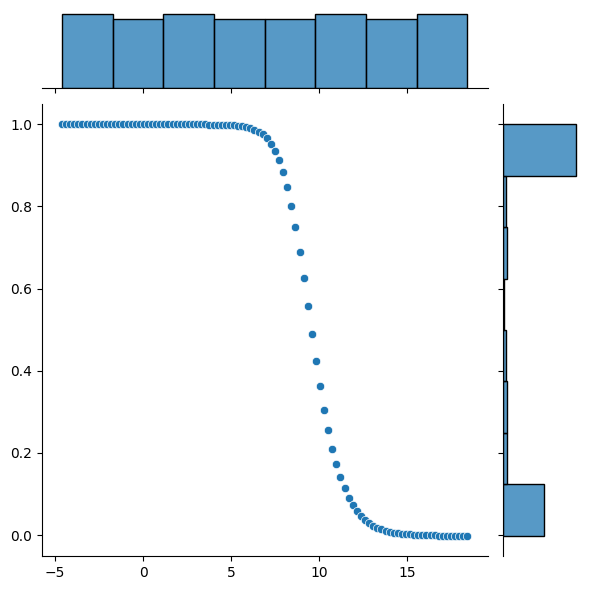

In [211]:
sns.jointplot(x=np.log(param_space),y=test_mean)

In [212]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{max(train_mean)}\t{max(test_mean)}
{'MSE'.ljust(10)}{mse(y_train,lm_r.predict(x_train_scale))}\t{mse(y_test,lm_r.predict(x_test_scale))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9996903057751945	0.9996783059901457
MSE       3.2528380130679064	3.5002382273595805



In [213]:
from sklearn.linear_model import Lasso

In [214]:
lm_l = Lasso(alpha=0.5)
lm_l.fit(x_train_scale,y_train)
r2_score(y_test,lm_l.predict(x_test_scale))

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.371e+03, tolerance: 2.130e+03



0.9992423435662974

In [215]:
from sklearn.model_selection import validation_curve 

In [216]:
param_space = np.logspace(-2,8,100)
param_space

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [217]:
train_score_lasso,test_score_lasso=validation_curve(
    Lasso(),
    x_train_scale,
    y_train,
    param_name="alpha",
    param_range=param_space,
    scoring="r2"
)
test_mean_lasso = np.mean(test_scores,axis=1)
train_mean_lasso = np.mean(train_scores,axis=1)

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.640e+03, tolerance: 1.716e+03

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.494e+03, tolerance: 1.716e+03

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.235e+

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.213e+03, tolerance: 1.716e+03

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.911e+03, tolerance: 1.716e+03

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.530e+

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.456e+03, tolerance: 1.701e+03

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.215e+03, tolerance: 1.701e+03

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.919e+

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.413e+03, tolerance: 1.675e+03

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.246e+03, tolerance: 1.675e+03

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.028e+

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.840e+03, tolerance: 1.720e+03

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.702e+03, tolerance: 1.720e+03

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.528e+

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.274e+03, tolerance: 1.709e+03

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.925e+03, tolerance: 1.709e+03

C:\Users\Josica\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.540e+

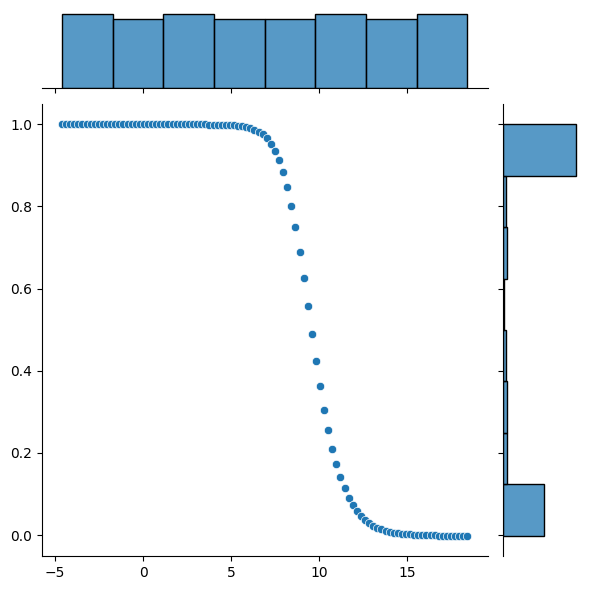

In [218]:
sns.jointplot(x=np.log(param_space),y=test_mean)

In [219]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{max(train_mean)}\t{max(test_mean)}
{'MSE'.ljust(10)}{mse(y_train,lm_r.predict(x_train_scale))}\t{mse(y_test,lm_r.predict(x_test_scale))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9996903057751945	0.9996783059901457
MSE       3.2528380130679064	3.5002382273595805

